# Milestone 1

# 1 - Introduction

Name: `Bandoro, FTDS 013`


Objective: 
```
1. Mampu memahami konsep Artificial Neural Network.
2. Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
3. Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
4. Mampu menganalisis dan menjelaskan layer yang dibuat.
```

- URL frontend: https://frontend-ml1-ftds013.herokuapp.com/
- URL backend: https://backend-ml1-ftds013.herokuapp.com/

# 2 - Import Libraries

In [271]:
# Below are the libraries that's used for this project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import sys
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC, ADASYN
from collections import Counter
import pickle
import json

# 3 - Data Loading dan Initial Processing

In [272]:
# set_options to show all the columns

pd.set_option('display.max.columns', None)

In [273]:
# loading data

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset is comprised of 7043 rows and 21 columns, every row represents a customer, and each column represent customer's information regarding the usage of telco company services. The information that's contained in this dataset include:

* CustomerID : customer id
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes or No)


In [274]:
# create data_copy as backup

data_copy = data.copy()

In [276]:
# observe the amount of data in every column including the data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains 1 column for float data type, 2 columns for integer data type, and 18 columns for object data type. We can see that although the 'TotalCharges' column has object data type, it actually contains numerical data, so I'll change the data type into float on the next step.

At a glance, we can see that the dataset contains no missing values as each column contains the same amount of data. 

In [277]:
# Convert the 'TotalCharges' column from object to float

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # errors = 'coerce' is used to convert empty string into missing values

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now we can see that the 'TotalCharges' column has been changed into float data type, there're 11 data that were previously empty string now are identified as missing values.

In [279]:
# observe the distributions of numerical columns

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


We can see that on average, customers would stay for 32 months using the company services ('tenure'). Monthly charges varies between 18 to 118 US dollars. Cumulative charges for customers also ranges between 18 to 8684 US dollars. Note: 'SeniorCitizen' column is actually a categorical representation with '1' means senior citizen (>60 y.o.) and '0' means not a senior citizen (<60 y.o.).

In [280]:
# specify the columns that contain numerical values and categorical values

num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

cat_columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

print('Total Columns: ', len(num_columns + cat_columns))

Total Columns:  21


# 4 - Exploratory Data Analysis/EDA (Pre-Splitting)

In [281]:
# Observe if there's missing values in the dataset

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there're 11 missing values in the 'TotalCharges' column, next I'll try to analyse whether these missing values are compromisable or not by looking at the data.

In [282]:
# Showing the rows that contain missing values

data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We know that 'TotalCharges' represents the accumulation of monthly charges of a customer, and since we don't have the data of monthly charges for the months before, we got no clue on how to replace the missing values in this column (replacing the value of 'TotalCharges' with mean or median wouldn't be representative in this case). Also because the missing values is small in proportion (< 1%), it can be considered save to drop them all.

In [283]:
# dropping the columns with missing values

data.drop(data[data['TotalCharges'].isnull()].index, axis=0, inplace=True) 

In [284]:
# Observe if there's missing values in the dataset

data.isnull().sum().sum()

0

Now, the dataset is free from missing values. 

In [285]:
# observe unique values in every categorical columns

for column in cat_columns:
    print(f'Unique values in {column}: ', data[column].unique(), '-->amount: ', len(data[column].unique()))

Unique values in customerID:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] -->amount:  7032
Unique values in gender:  ['Female' 'Male'] -->amount:  2
Unique values in SeniorCitizen:  [0 1] -->amount:  2
Unique values in Partner:  ['Yes' 'No'] -->amount:  2
Unique values in Dependents:  ['No' 'Yes'] -->amount:  2
Unique values in PhoneService:  ['No' 'Yes'] -->amount:  2
Unique values in MultipleLines:  ['No phone service' 'No' 'Yes'] -->amount:  3
Unique values in InternetService:  ['DSL' 'Fiber optic' 'No'] -->amount:  3
Unique values in OnlineSecurity:  ['No' 'Yes' 'No internet service'] -->amount:  3
Unique values in OnlineBackup:  ['Yes' 'No' 'No internet service'] -->amount:  3
Unique values in DeviceProtection:  ['No' 'Yes' 'No internet service'] -->amount:  3
Unique values in TechSupport:  ['No' 'Yes' 'No internet service'] -->amount:  3
Unique values in StreamingTV:  ['No' 'Yes' 'No internet service'] -->amount:  3
Unique values in Stream

Above is seen that most categorical columns contain two to three categories, we can also see that there's no unexpected missing values in this case.

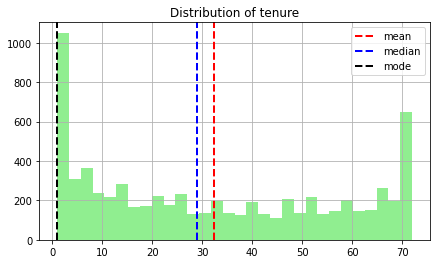

Mean:  32.421786120591584
Median:  29.0
Mode : 1
Skewness: 0.23773083190513133


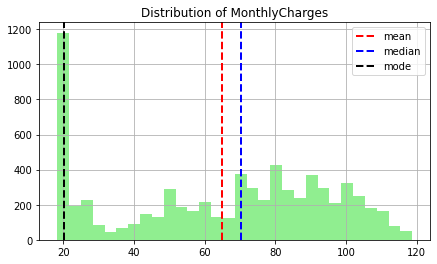

Mean:  64.79820819112628
Median:  70.35
Mode : 20.05
Skewness: -0.22210292770166232


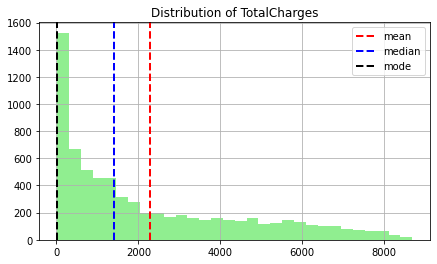

Mean:  2283.300440841866
Median:  1397.475
Mode : 20.2
Skewness: 0.9616424997242504


In [286]:
# Visualize the distribution of numerical columns

for column in num_columns:
    a = data[column]
    a.hist(bins=30, figsize=(7,4), color='lightgreen')
    plt.axvline(a.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
    plt.axvline(a.median(), color='blue', linestyle='dashed', linewidth=2, label='median')
    plt.axvline(a.mode()[0], color='black', linestyle='dashed', linewidth=2, label='mode')
    plt.legend()
    plt.title(f'Distribution of {column}')
    plt.show()
    print('Mean: ', a.mean())
    print('Median: ', a.median())
    print('Mode :', a.mode()[0])
    print('Skewness:', a.skew())

Two from three of the numerical columns ('tenure' and 'MonthlyCharges') are normally distributed, and 'TotalCharges' is moderately skewed to the right. Many of the customers are newcomers in using the company services ('tenure' mode = 1 month). We can also see that the average (mean) for monthly charges is around 64.7 US dollars and the average (median) for total charges is around 1397 US dollars.

Next, since it's important to know the parity of the data we're dealing with, I'll check the proportion of both positive and negative targets.

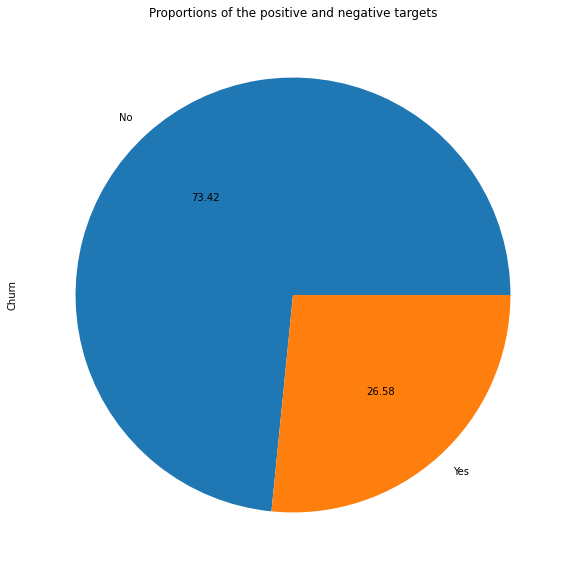

Proportion of positive target ('Churn' = yes):  0.26578498293515357
Proportion of negative target ('Churn' = no):  0.7342150170648464


In [287]:
# explore the proportion of target column

data['Churn'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')
plt.title('Proportions of the positive and negative targets')
plt.show()

print("Proportion of positive target ('Churn' = yes): ", len(data[data['Churn'] == 'Yes'])/len(data))
print("Proportion of negative target ('Churn' = no): ", len(data[data['Churn'] == 'No'])/len(data))

Now we know that we're dealing with imbalanced data with negative samples (churn = no) almost triples the amount of positive samples (churn = yes), this can be managed however by applying the oversampling method for the positive samples in the next proccess.

# 5 - Data Preprocessing

## Taking data for inference

In [355]:
# Taking 20 data for inference

data_inf = data.sample(20, random_state=19)
data_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3862,5854-KSRBJ,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1782.05,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
2926,0106-UGRDO,Female,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.00,8182.85,No
6056,8331-ZXFOE,Female,0,No,No,58,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),71.10,4299.20,No
3799,2930-UOTMB,Female,0,No,No,31,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),65.25,1994.30,Yes


In [289]:
# dropping inference data from primary dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [290]:
# Reset the index of primary and inference dataframe to minimize the possibility of processing error 

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Splitting Dataset

In [291]:
# separate features and target

y = data_train_test['Churn']
X = data_train_test.drop(columns='Churn', axis=1)

In [292]:
# train test split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

print('X_train_full shape: ', X_train_full.shape)
print('X_Test shape: ', X_test.shape)
print('y_train_full shape: ', y_train_full.shape)
print('y_Test shape: ', y_test.shape)

X_train_full shape:  (5609, 20)
X_Test shape:  (1403, 20)
y_train_full shape:  (5609,)
y_Test shape:  (1403,)


## Exploratory Data Analysis/EDA (Post-Splitting)

First, I'll try to create a heatmap to find the correlation between the variables within the dataset, then I'll investigate the different characteristics between the customers who chose to churn and not.

In [293]:
# create a dataframe for heatmap purpose

heatmap_df = pd.concat([X_train_full, y_train_full], axis=1).reset_index(drop=True)

In [294]:
# select the columns that has binary or multiple category for encoding purposes

cat_columns_binary = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
cat_columns_multiple = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [295]:
# encode the binary columns

cat_columns_binary_df = pd.DataFrame(OrdinalEncoder().fit_transform(heatmap_df[cat_columns_binary]), columns=cat_columns_binary)
cat_columns_binary_df

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
5604,0.0,0.0,0.0,1.0,1.0,1.0
5605,1.0,0.0,0.0,1.0,1.0,1.0
5606,1.0,1.0,1.0,1.0,1.0,0.0
5607,1.0,0.0,0.0,1.0,1.0,0.0


In [296]:
# define functions to one hot encode multiple category columns

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess_inputs(df):
    df = df.copy()
    for column, prefix in [('MultipleLines','MTPL'), ('InternetService','IS'), 
    ('OnlineSecurity','OS'), ('OnlineBackup','OB'), ('DeviceProtection','DP'), 
    ('TechSupport', 'TS'), ('StreamingTV','ST'), ('StreamingMovies','SM'),
    ('Contract', 'C'), ('PaymentMethod', 'PM')]:
        df = onehot_encode(df, column, prefix)
    return df

# encode the multiple catagory columns

cat_columns_multiple_df = preprocess_inputs(heatmap_df[cat_columns_multiple])
cat_columns_multiple_df

,MTPL_No,MTPL_No phone service,MTPL_Yes,IS_DSL,IS_Fiber optic,IS_No,OS_No,OS_No internet service,OS_Yes,OB_No,OB_No internet service,OB_Yes,DP_No,DP_No internet service,DP_Yes,TS_No,TS_No internet service,TS_Yes,ST_No,ST_No internet service,ST_Yes,SM_No,SM_No internet service,SM_Yes,C_Month-to-month,C_One year,C_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
5605,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
5606,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
5607,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


In [297]:
#concatenate the encoded heatmap dataframe

heatmap_df_encoded = pd.concat([cat_columns_multiple_df, heatmap_df[num_columns], cat_columns_binary_df], axis=1)
heatmap_df_encoded

,MTPL_No,MTPL_No phone service,MTPL_Yes,IS_DSL,IS_Fiber optic,IS_No,OS_No,OS_No internet service,OS_Yes,OB_No,OB_No internet service,OB_Yes,DP_No,DP_No internet service,DP_Yes,TS_No,TS_No internet service,TS_Yes,ST_No,ST_No internet service,ST_Yes,SM_No,SM_No internet service,SM_Yes,C_Month-to-month,C_One year,C_Two year,PM_Bank transfer (automatic),PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,72,64.75,4804.75,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,10,24.50,270.15,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,34,60.85,2003.60,0.0,1.0,0.0,1.0,1.0,0.0
3,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,35,19.15,638.00,1.0,0.0,0.0,1.0,1.0,0.0
4,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,38,20.30,749.35,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,60.15,60.15,0.0,0.0,0.0,1.0,1.0,1.0
5605,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,90.55,90.55,1.0,0.0,0.0,1.0,1.0,1.0
5606,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,11,20.45,250.80,1.0,1.0,1.0,1.0,1.0,0.0
5607,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,3,65.25,209.90,1.0,0.0,0.0,1.0,1.0,0.0


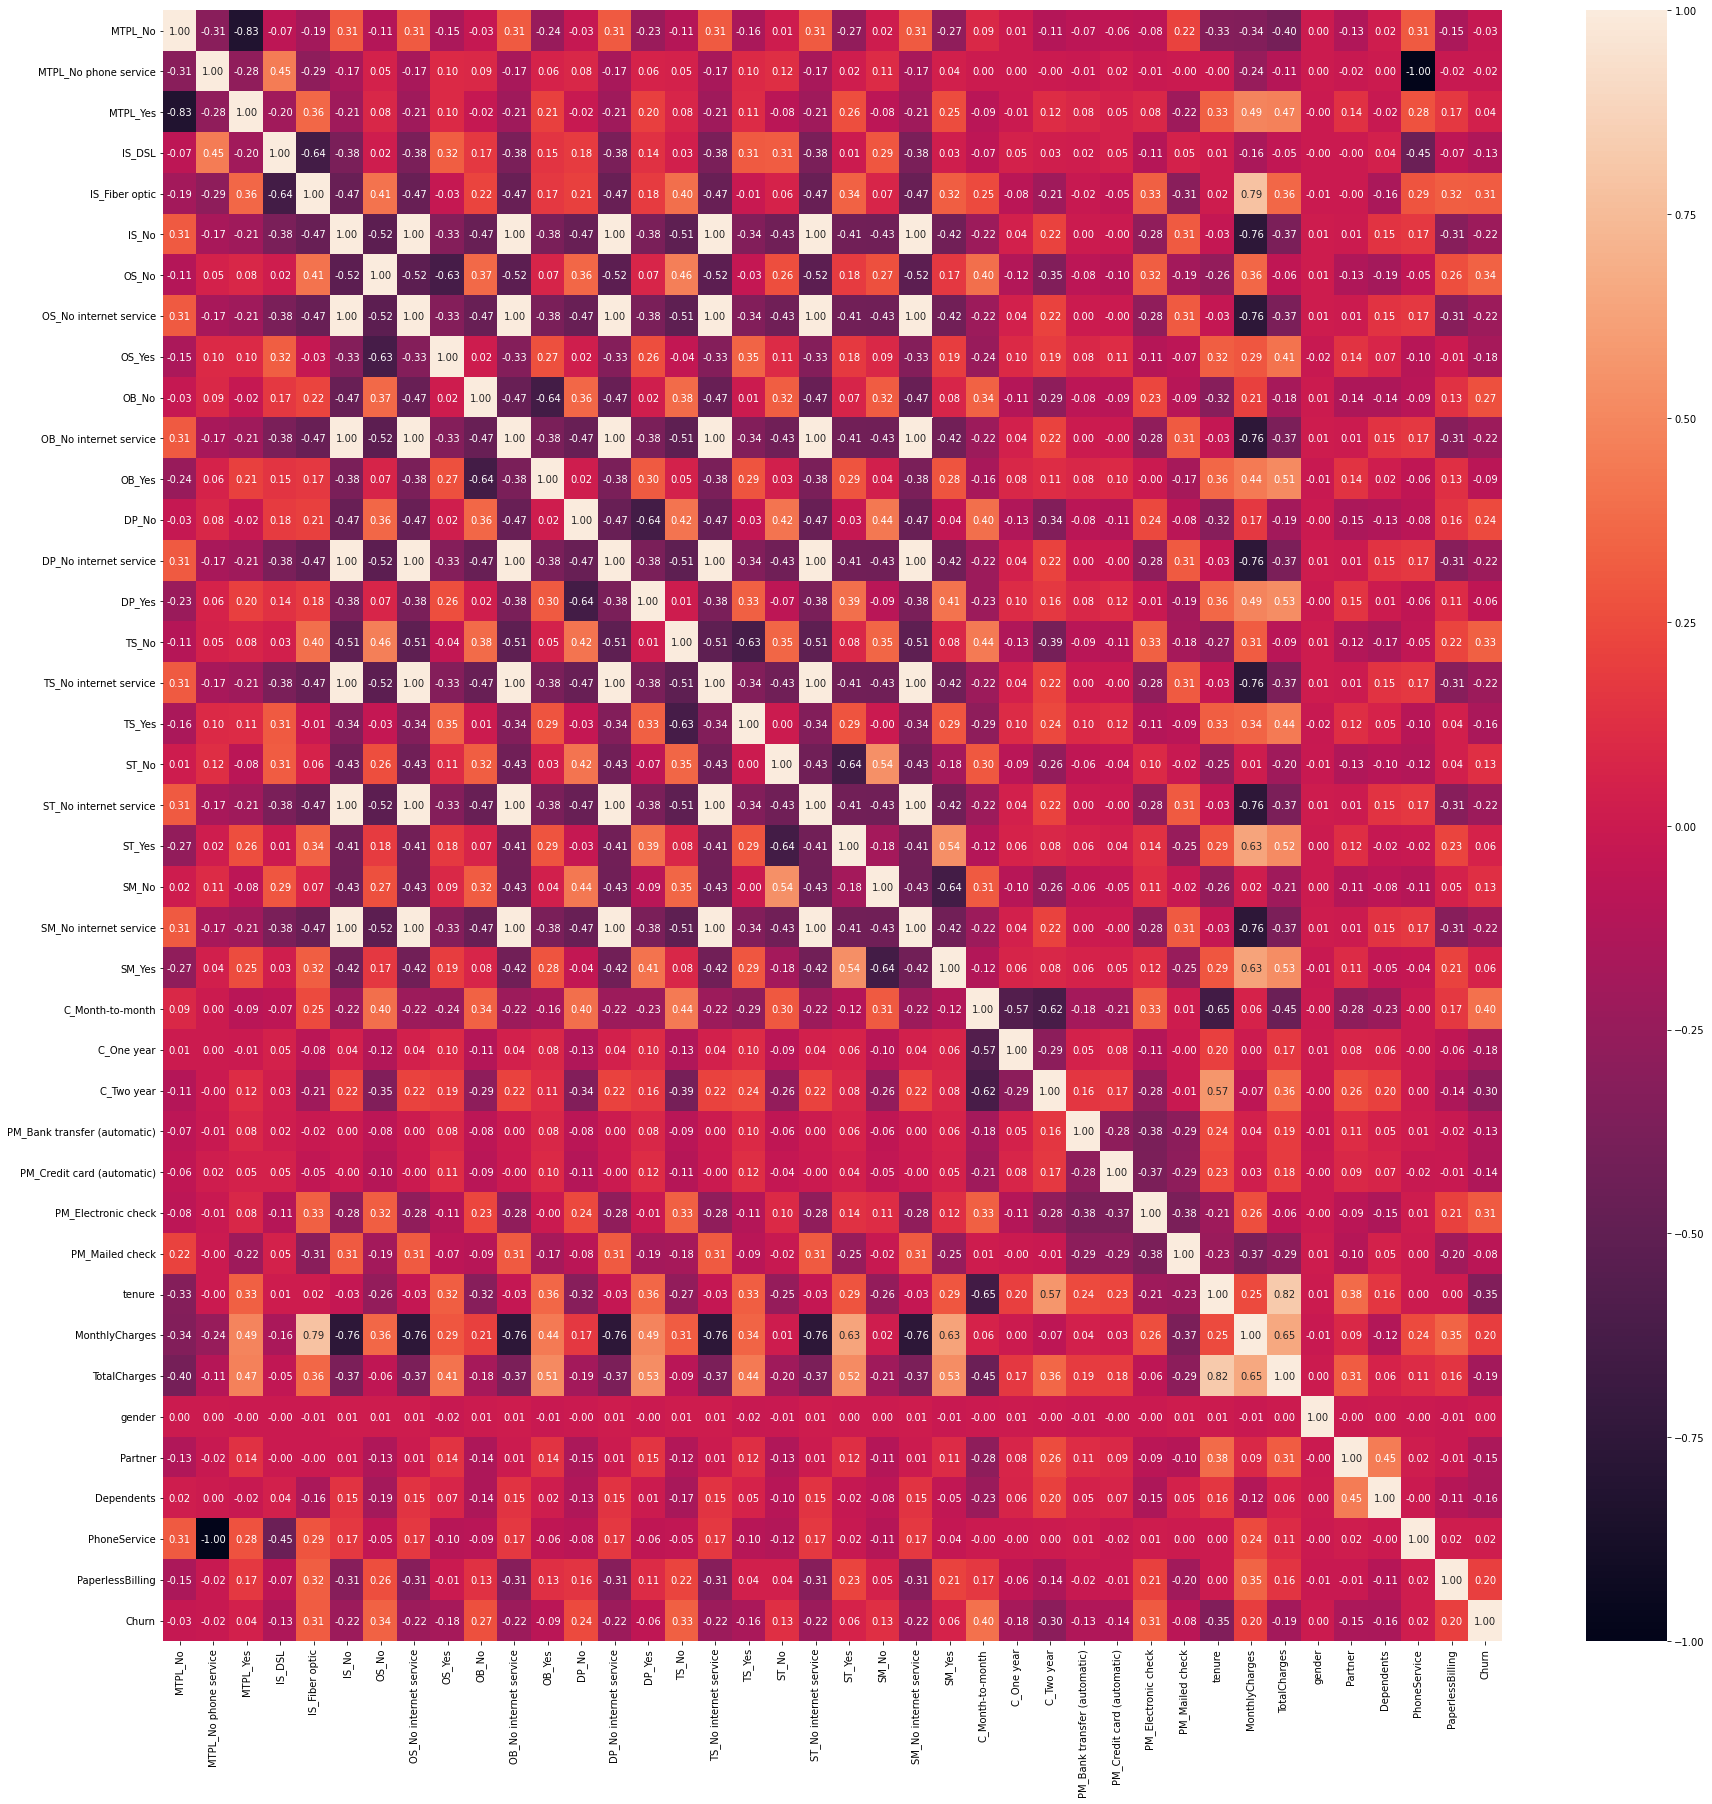

In [298]:
# observe the correlation between each variable from the train data

plt.figure(figsize=(30,30))
sns.heatmap(heatmap_df_encoded.corr(), annot=True, fmt='.2f')
plt.show()

From the heatmap above we can infer that:
* 'C_Month-to-month', 'OS_No', 'TS_No' have the highest positive correlation to 'Churn' variables. This possibly means that the customers who're likely to churn are those who assign to monthly rather than yearly contract, customers who chose no online security services, and customers who chose no tech support services.
* 'tenure' is negatively correlated to 'Churn'. This might means that customers who stayed longer on using the company services are less likely to churn.
* The other variables that have some influence to customer's churn are the usage of electronic check ('PM_Electronic check'), the amount of monthly charges ('MonthlyCharges'), and whether the customers are having partners or dependents (customers who're having partner or dependents are less likely to churn).
* We can also see that 'MonthlyCharges' have high negative correlations with variables related to no internet services ('IS_No', 'OS_No internet service', etc.). This means that the amount of monthly charges incurred to the customer is highly predetermined by whether the customer assigned to the internet services or not. It's kinda make sense since most of the telco company services are related to the usage of internet.
* Furthermore, the amount of Monthly charges is highly correlated with the usage of fiber optic internet ('IS_Fiber optic'), TV streaming ('ST_Yes'), and movie streaming ('SM_Yes'), indicating that these services are relatively more expensive (or are used more extensively) than the other services.
* Churn rate has no correlation whatsoever with regard to customer's gender (male/female).


List of abbreviations: ('MultipleLines'='MTPL'), ('InternetService'='IS'), 
    ('OnlineSecurity'='OS'), ('OnlineBackup'='OB'), ('DeviceProtection'='DP'), 
    ('TechSupport'= 'TS'), ('StreamingTV'='ST'), ('StreamingMovies'='SM'),
    ('Contract'= 'C'), ('PaymentMethod'= 'PM')

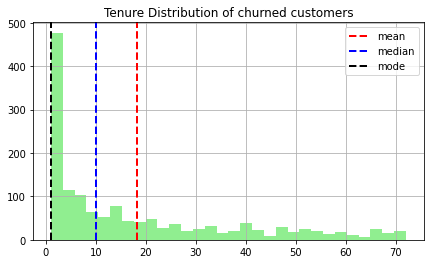

Mean:  18.193089430894307
Median:  10.0
Mode : 1
Skewness: 1.1364598624901057


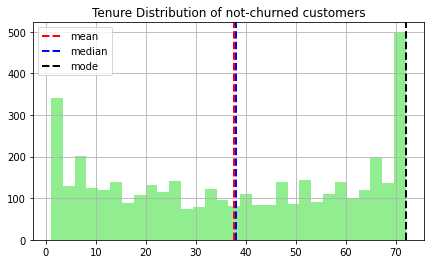

Mean:  37.69828211952577
Median:  38.0
Mode : 72
Skewness: -0.034495201203622955


In [299]:
# exploring the differences of tenure between churned and not-churned customers

tenure_churned = heatmap_df[heatmap_df['Churn'] == 'Yes']['tenure']
tenure_not_churned = heatmap_df[heatmap_df['Churn'] == 'No']['tenure']

tenure_churned.hist(bins=30, figsize=(7,4), color='lightgreen')
plt.axvline(tenure_churned.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(tenure_churned.median(), color='blue', linestyle='dashed', linewidth=2, label='median')
plt.axvline(tenure_churned.mode()[0], color='black', linestyle='dashed', linewidth=2, label='mode')
plt.legend()
plt.title(f'Tenure Distribution of churned customers')
plt.show()
print('Mean: ', tenure_churned.mean())
print('Median: ', tenure_churned.median())
print('Mode :', tenure_churned.mode()[0])
print('Skewness:', tenure_churned.skew())

tenure_not_churned.hist(bins=30, figsize=(7,4), color='lightgreen')
plt.axvline(tenure_not_churned.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(tenure_not_churned.median(), color='blue', linestyle='dashed', linewidth=2, label='median')
plt.axvline(tenure_not_churned.mode()[0], color='black', linestyle='dashed', linewidth=2, label='mode')
plt.legend()
plt.title(f'Tenure Distribution of not-churned customers')
plt.show()
print('Mean: ', tenure_not_churned.mean())
print('Median: ', tenure_not_churned.median())
print('Mode :', tenure_not_churned.mode()[0])
print('Skewness:', tenure_not_churned.skew())

We can see that, the customers who decide not to churn are those have been stayed longer using the company services (average tenure 37 months, compared to 10 months median tenure of those who churn). We can also see that most of those who churned are the customers how has only been staying for 1 month. This finding might signify the importance of the company putting more effort in prioritizing their loyal customers.

In [300]:
heatmap_df.groupby('InternetService', as_index=False)['MonthlyCharges'].mean()

,InternetService,MonthlyCharges
0,DSL,58.081302
1,Fiber optic,91.575274
2,No,21.096417


Text(0.5, 1.0, 'Monthly charges for internet services')

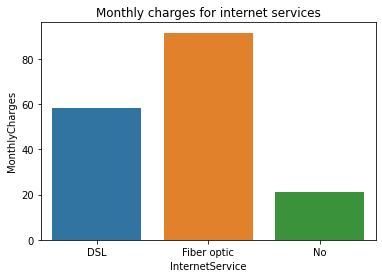

In [301]:
# exploring the monthly prices issued for different types of internet services

internet_service_charges = heatmap_df.groupby('InternetService', as_index=False)['MonthlyCharges'].mean()

sns.barplot(x=internet_service_charges['InternetService'],y=internet_service_charges['MonthlyCharges'],orient='v')
plt.title('Monthly charges for internet services')


It's seen above, that the monthly charges are higher in customers who uses Fiber Optic internet services, this makes sense since fiber optic itself has a better quality compared to DSL with regards to the internet speed.

## Handling Outliers

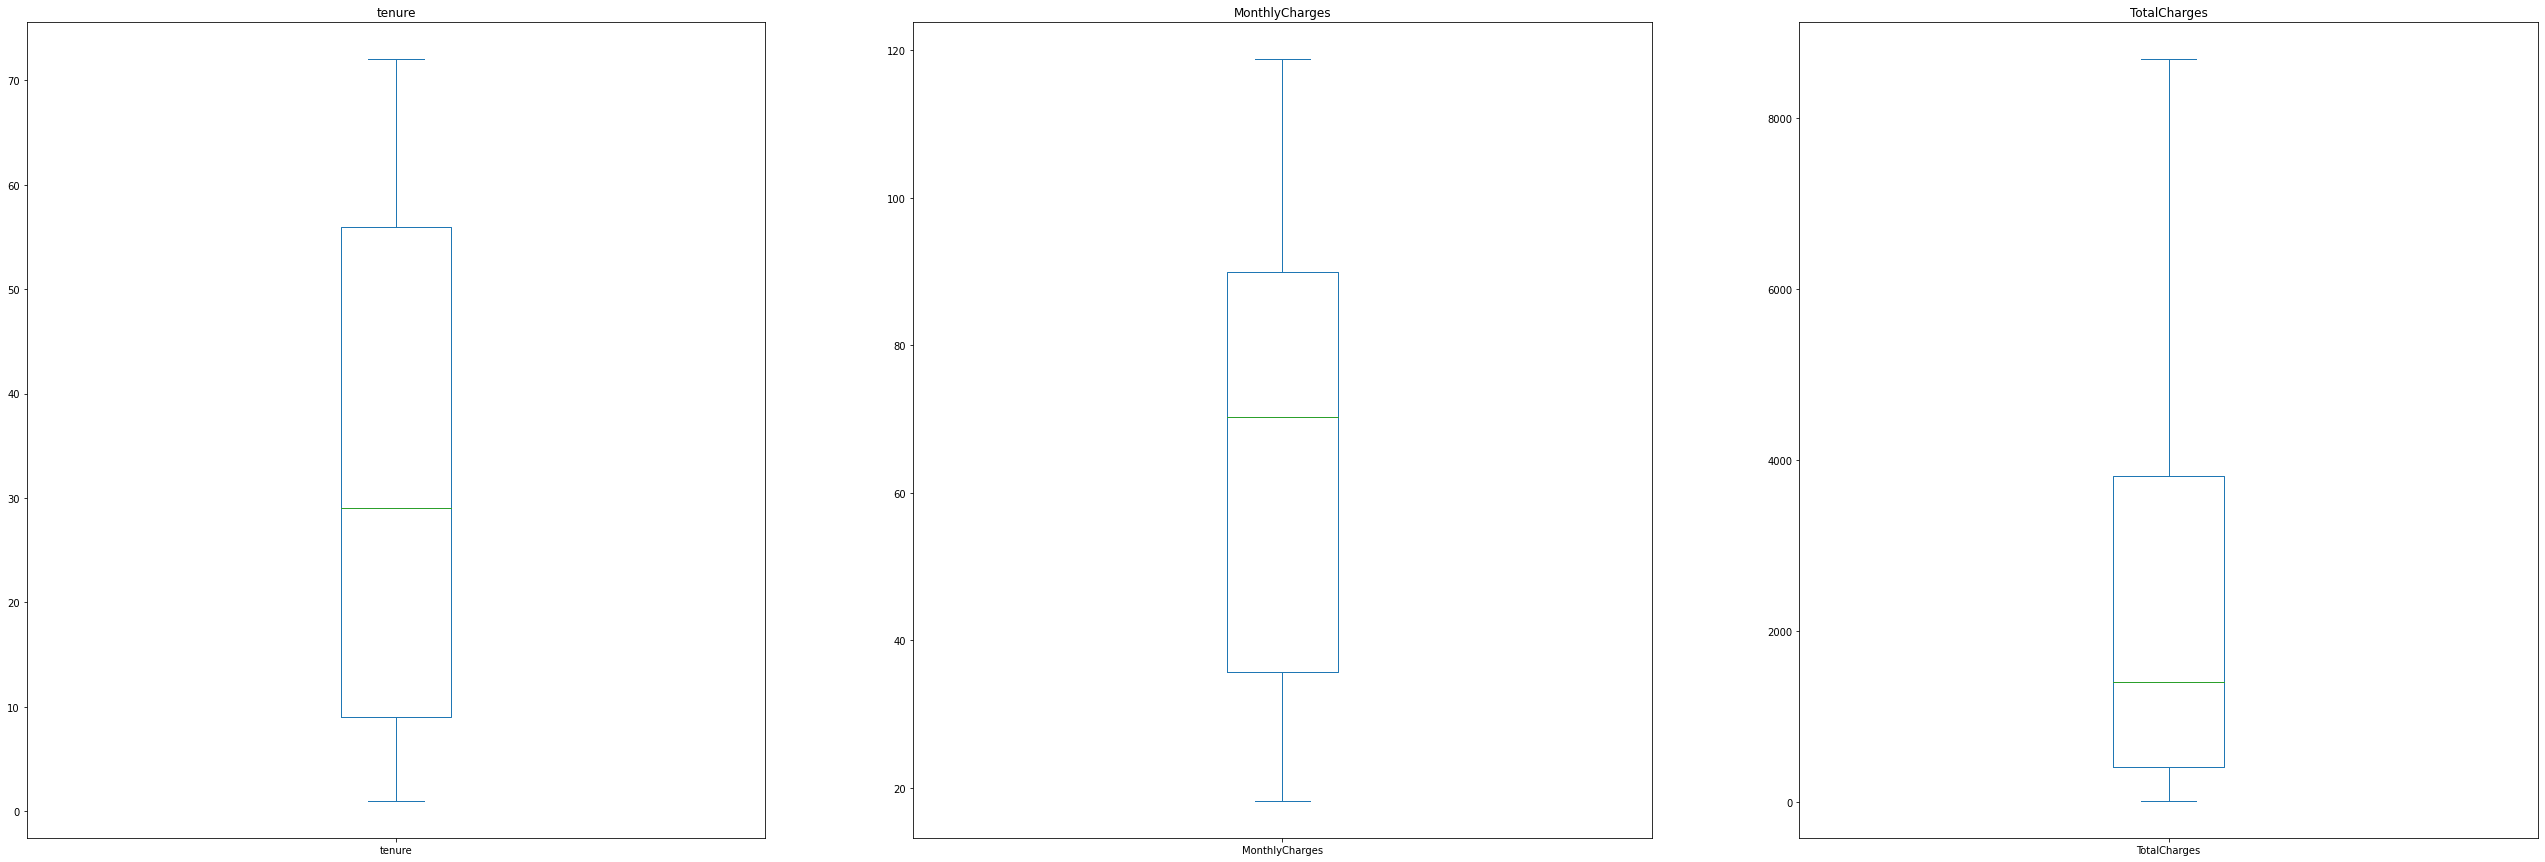

In [302]:
# Observing outliers in X_train numeric columns using boxplot

figs, axs = plt.subplots(ncols=3,figsize=(45,15))

for i in range(3):
    X_train_full[num_columns[i]].plot(kind='box', title= num_columns[i], ax=axs[i]) 

plt.show()

It can be seen that there's no outliers in each numerical column.

## Handling missing values

In [303]:
# Observinf the missing values in the dataset

print('Missing Values X_train_full:', X_train_full.isnull().sum().sum())
print('Missing Values X_test:', X_test.isnull().sum().sum())
print('Missing Values y_train_full:', y_train_full.isnull().sum())
print('Missing Values y_test:', y_test.isnull().sum())

Missing Values X_train_full: 0
Missing Values X_test: 0
Missing Values y_train_full: 0
Missing Values y_test: 0


Since missing values has been dropped in the beginning, none are left to be handled currently.

## Features Selection

The feature that I select will be considered based on the correlation it had to the target variable ('Churn'). In this case I'll pick variable that has more or less > 0.15 or < -0.15 correlation to the target. I'll re-shown the correlation below:

In [304]:
heatmap_df_encoded.corr()['Churn'].sort_values().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
index,tenure,C_Two year,ST_No internet service,TS_No internet service,DP_No internet service,OS_No internet service,OB_No internet service,IS_No,SM_No internet service,TotalCharges,C_One year,OS_Yes,TS_Yes,Dependents,Partner,PM_Credit card (automatic),IS_DSL,PM_Bank transfer (automatic),OB_Yes,PM_Mailed check,DP_Yes,MTPL_No,MTPL_No phone service,gender,PhoneService,MTPL_Yes,ST_Yes,SM_Yes,SM_No,ST_No,MonthlyCharges,PaperlessBilling,DP_No,OB_No,PM_Electronic check,IS_Fiber optic,TS_No,OS_No,C_Month-to-month,Churn
Churn,-0.349821,-0.30141,-0.224613,-0.224613,-0.224613,-0.224613,-0.224613,-0.224613,-0.224613,-0.194108,-0.175967,-0.175409,-0.16257,-0.162183,-0.151829,-0.137878,-0.133282,-0.125257,-0.085754,-0.084776,-0.060808,-0.027531,-0.019686,0.001428,0.019686,0.039516,0.059093,0.060659,0.12869,0.130158,0.195067,0.198764,0.244467,0.268255,0.30695,0.313885,0.333201,0.343619,0.403172,1.0


List of abbreviations: ('MultipleLines'='MTPL'), ('InternetService'='IS'), 
    ('OnlineSecurity'='OS'), ('OnlineBackup'='OB'), ('DeviceProtection'='DP'), 
    ('TechSupport'= 'TS'), ('StreamingTV'='ST'), ('StreamingMovies'='SM'),
    ('Contract'= 'C'), ('PaymentMethod'= 'PM')

In [305]:
# Features selected

num_features = ['tenure', 'TotalCharges',  'MonthlyCharges']
cat_features = ['Dependents', 'Partner', 'PaperlessBilling', 'Contract', 'InternetService','OnlineSecurity', 'TechSupport',  'DeviceProtection', 'OnlineBackup', 'PaymentMethod']

print('Initial features: ', len(X_train_full.columns))
print('Total features selected: ', len(num_features+cat_features))

Initial features:  20
Total features selected:  13


As a note, I don't pick 'StreamingTV' and 'StreamingMovies' as features because their correlation (ST_No internet service, 'TS_No internet service') are already represented by the correlation of the 'InternetService' itself.

## Data Scaling and Encoding

In [306]:
# using make_column_transformer to join the scaling and encoding processes

column_trans = make_column_transformer(
    (StandardScaler(), num_features), # since 2/3 of the numeric features has normal distributions and none of them has outliers, I use standard scaler as scaling method
    (OrdinalEncoder(), ['Dependents', 'Partner', 'PaperlessBilling']), # the data is actually nominal not ordinal, but because it's binary, Ordinal encoder (categories = 'auto' by default) can be considered
    (OneHotEncoder(), ['Contract', 'InternetService','OnlineSecurity', 'TechSupport',  'DeviceProtection', 'OnlineBackup', 'PaymentMethod']),
    remainder='drop', sparse_threshold=0

)

X_train_final = column_trans.fit_transform(X_train_full)
X_test_final = column_trans.transform(X_test)

In [307]:
# encode the target variable

label_encoder = LabelEncoder()

y_train_final = label_encoder.fit_transform(y_train_full)
y_test_final = label_encoder.transform(y_test)

In [308]:
# Checking the shape of the final data

print('X_train_final:', X_train_final.shape)
print('X_test_final:', X_test_final.shape)
print('y_train_final:', y_train_final.shape)
print('y_test_final:', y_test_final.shape)

X_train_final: (5609, 28)
X_test_final: (1403, 28)
y_train_final: (5609,)
y_test_final: (1403,)


In [309]:
# splitting X_train_final and y_train_final into train and validation (I'm using 15% of train data as validation)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_final, y_train_final, shuffle=True, test_size=0.15, random_state=10)

print("X_train data shape: {}".format(X_train.shape))
print("y_train data shape: {}".format(y_train.shape))
print("X_valid data shape: {}".format(X_valid.shape))
print("y_valid data shape: {}".format(y_valid.shape))
print("X_test data shape: {}".format(X_test_final.shape))
print("y_test data shape: {}".format(y_test_final.shape))

X_train data shape: (4767, 28)
y_train data shape: (4767,)
X_valid data shape: (842, 28)
y_valid data shape: (842,)
X_test data shape: (1403, 28)
y_test data shape: (1403,)


## Make Tensorflow data input with batch size of 128

In [310]:
# tensorflow input data pipeline

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(128)
valid_data = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(128)
test_data = tf.data.Dataset.from_tensor_slices((X_test_final, y_test_final)).batch(128)

# 6 - Model definition

In this case, I'll be using Artificial Neural Network (ANN) as the primary classifier. I'll create 2 models, one of which is ANN with sequential API, and the second is ANN with functional API. Furthermore, I'm going to improve both of these models by optimizing their attributes and parameters.

## Defining ANN (Sequential API)

In [311]:
# Defining the model

model_seq = keras.models.Sequential()
model_seq.add(keras.layers.Dense(16, activation='relu', input_dim=28))
model_seq.add(keras.layers.Dense(8, activation='relu'))
model_seq.add(keras.layers.Dense(1, activation='sigmoid'))

As can be seen above, I'm creating an ANN with sequential API which is consisted of 1 input layer, 2 hidden layers, and 1 output layer. The input layer receives tabular data of 28 dimensional features. The first dense hidden layer contains 16 neurons and it will use relu as the activation function. The second dense hidden layer contains half as much of neurons and also get activated by relu function. Lastly, the output layer is having only one neuron with sigmoid activation function since it's expected to provide binary outputs. 

Below are the the summary and visualization of my model.

In [312]:
# showing model summary

model_seq.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 16)                464       
                                                                 
 dense_76 (Dense)            (None, 8)                 136       
                                                                 
 dense_77 (Dense)            (None, 1)                 9         
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


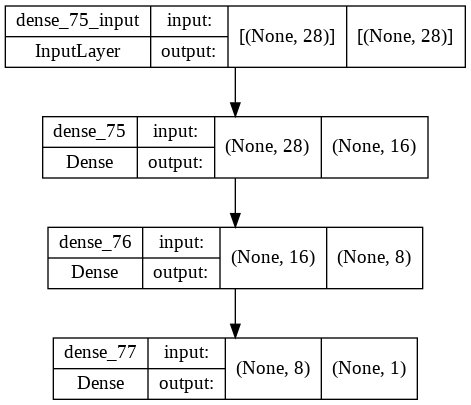

In [313]:
# showing model visualization

keras.utils.plot_model(model_seq, show_shapes=True)

In [314]:
# compile the model

model_seq.compile(loss= keras.losses.BinaryCrossentropy(),
              optimizer= keras.optimizers.Adam(),
              metrics= keras.metrics.BinaryAccuracy())

In compiling the model, I use 'BinaryCrossentropy' loss because the label is binary (either 0 or 1). For the optimizer, I use Adaptive Moment Estimation (Adam) since it combines the strength of both 'gradient descent with momentum' and 'RMSProp' algorithm, it requires less memory and more efficient, which explains why it's frequently used as a default go to optimizers. 

## Defining ANN (Functional API)

In [315]:
# defining the model

input_ = keras.layers.Input(shape=(28,))
hidden1 = keras.layers.Dense(16, activation='relu')(input_)
hidden2 = keras.layers.Dense(8, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation='sigmoid')(concat)
model_func = keras.models.Model(inputs=[input_], outputs= [output])

Above, I'm creating an ANN with functional API which is consisted of 1 input layer, 2 hidden layers, 1 output layer, and a layer in the form of concatenation between the input and the 2nd hidden layer. The input layer receives tabular data of 28 dimensional features. The first dense hidden layer contains 16 neurons and it will use relu as the activation function. The second dense hidden layer contains half as much of neurons and also get activated by relu function. Lastly, the output layer is having only one neuron with sigmoid activation function since it's expected to provide binary outputs. 

Below are the the summary and visualization of my model.

In [316]:
# showing model summary

model_func.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 28)]         0           []                               
                                                                                                  
 dense_78 (Dense)               (None, 16)           464         ['input_20[0][0]']               
                                                                                                  
 dense_79 (Dense)               (None, 8)            136         ['dense_78[0][0]']               
                                                                                                  
 concatenate_19 (Concatenate)   (None, 36)           0           ['input_20[0][0]',               
                                                                  'dense_79[0][0]']        

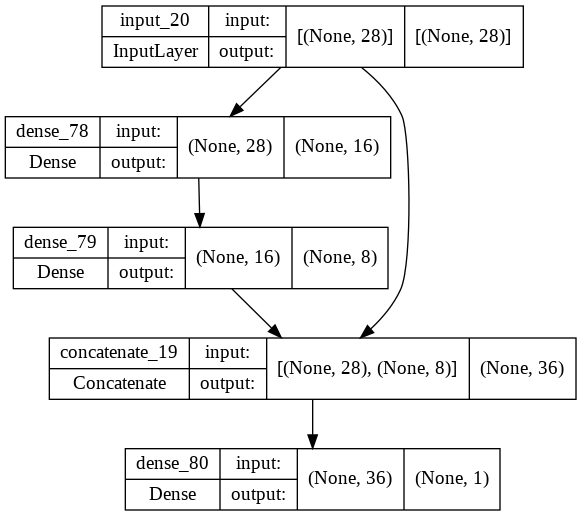

In [317]:
# showing model visualization

keras.utils.plot_model(model_func, show_shapes=True)

In [318]:
# compile the model

model_func.compile(loss= keras.losses.BinaryCrossentropy(),
              optimizer= keras.optimizers.Adam(),
              metrics= keras.metrics.BinaryAccuracy())

# 7 - Model training and evaluation

## Train and evaluate the sequential model

In [319]:
# training the sequential model

history_seq = model_seq.fit(train_data, epochs=300,
          validation_data=valid_data)

Epoch 1/300
38/38 [==============================] - 1s 6ms/step - loss: 0.7070 - binary_accuracy: 0.5121 - val_loss: 0.5990 - val_binary_accuracy: 0.7043
Epoch 2/300
38/38 [==============================] - 0s 4ms/step - loss: 0.5489 - binary_accuracy: 0.7376 - val_loss: 0.5169 - val_binary_accuracy: 0.7518
Epoch 3/300
38/38 [==============================] - 0s 4ms/step - loss: 0.4867 - binary_accuracy: 0.7697 - val_loss: 0.4756 - val_binary_accuracy: 0.7755
Epoch 4/300
38/38 [==============================] - 0s 4ms/step - loss: 0.4543 - binary_accuracy: 0.7879 - val_loss: 0.4500 - val_binary_accuracy: 0.7838
Epoch 5/300
38/38 [==============================] - 0s 4ms/step - loss: 0.4369 - binary_accuracy: 0.7919 - val_loss: 0.4362 - val_binary_accuracy: 0.7815
Epoch 6/300
38/38 [==============================] - 0s 3ms/step - loss: 0.4282 - binary_accuracy: 0.7938 - val_loss: 0.4295 - val_binary_accuracy: 0.7850
Epoch 7/300
38/38 [==============================] - 0s 4ms/step - los

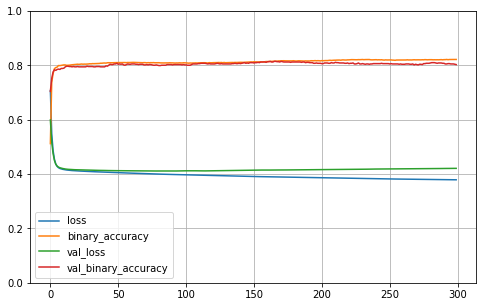

In [320]:
# Graphing the performance of sequential model on every epoch

pd.DataFrame(history_seq.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We can see that for the sequential model, the training loss and acurracy are steadily improved on every epoch, while the validation loss and accuracy are steadily diverged with respect to the training results after epoch 50. This indicates that after the 50th epoch (more or less), the model starts to become overfit to the training data, although not for quite a lot of margin. Next, I'll evaluate the model performance with regard to the test data.

In [321]:
# evaluating sequential model performance on test data

print('Classification report (Train)')
y_train_proba_seq = model_seq.predict(X_train)
y_train_pred_seq = np.where(y_train_proba_seq >= 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_seq))

print('')

print('Classification report (Test)')
y_test_proba_seq = model_seq.predict(X_test_final)
y_test_pred_seq = np.where(y_test_proba_seq >= 0.5, 1, 0)
print(classification_report(y_test_final, y_test_pred_seq))

Classification report (Train)
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3523
           1       0.69      0.58      0.63      1244

    accuracy                           0.82      4767
   macro avg       0.77      0.74      0.76      4767
weighted avg       0.81      0.82      0.82      4767


Classification report (Test)
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1017
           1       0.61      0.51      0.56       386

    accuracy                           0.77      1403
   macro avg       0.72      0.69      0.70      1403
weighted avg       0.77      0.77      0.77      1403



As can be seen above, the sequential model shows the performance of f1 score up to 0.56 on the test data. This amount of f1 score can be regarded as acceptable although still far from excellent (I'm using >0.5 as the treshold for an acceptable f1 score, https://stephenallwright.com/good-f1-score/). Since f1 score for the train data is 0.63 (not to far of a difference with f1 score from test data), the model can be regarded as a goodfit. 

The accuracy score is quite good (0.77), but since our data is imbalance (only 26% of the data is labelled as positive/'Churn'='Yes'), accuracy might not be a very good representation for model performance.

In the next step I'll try to tweak the baseline model in the hope that we can get a better performance. 

## Train and evaluate the functional model

In [322]:
# training the functional model

history_func = model_func.fit(train_data, epochs=300,
                    validation_data= valid_data)


Epoch 1/300
38/38 [==============================] - 1s 7ms/step - loss: 0.6142 - binary_accuracy: 0.6367 - val_loss: 0.5483 - val_binary_accuracy: 0.6900
Epoch 2/300
38/38 [==============================] - 0s 4ms/step - loss: 0.5121 - binary_accuracy: 0.7428 - val_loss: 0.4785 - val_binary_accuracy: 0.7755
Epoch 3/300
38/38 [==============================] - 0s 4ms/step - loss: 0.4658 - binary_accuracy: 0.7802 - val_loss: 0.4507 - val_binary_accuracy: 0.7779
Epoch 4/300
38/38 [==============================] - 0s 4ms/step - loss: 0.4489 - binary_accuracy: 0.7885 - val_loss: 0.4402 - val_binary_accuracy: 0.7827
Epoch 5/300
38/38 [==============================] - 0s 4ms/step - loss: 0.4401 - binary_accuracy: 0.7913 - val_loss: 0.4344 - val_binary_accuracy: 0.7838
Epoch 6/300
38/38 [==============================] - 0s 4ms/step - loss: 0.4340 - binary_accuracy: 0.7940 - val_loss: 0.4301 - val_binary_accuracy: 0.7862
Epoch 7/300
38/38 [==============================] - 0s 4ms/step - los

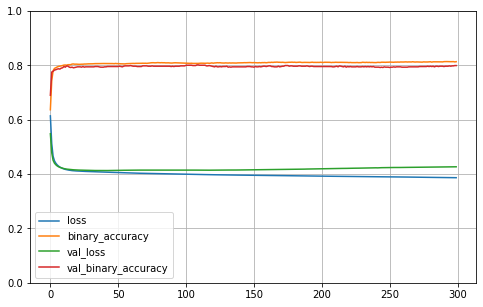

In [323]:
# Graphing the performance of functional model on every epoch

pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Here, we can see that ANN with functional API shows a training graph which's quite similar to our sequential model before. This probably due to the similarity of the amount of hidden layer and neurons that I selected for each model (in both I placed 16 neuron for the first hidden layer and 8 neuron for the second one). Divergence of validation results from the train also can be seen after the 50th epoch, although it's not as much as the sequential model before. This might indicates a slightly better performance in our functional model compared to the sequential model before.

In [324]:
# evaluating functional model performance on test data

print('Classification report (Train)')
y_train_proba_func = model_func.predict(X_train)
y_train_pred_func = np.where(y_train_proba_func >= 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_func))
print('')
print('Classification report (Test)')
y_test_proba_func = model_func.predict(X_test_final)
y_test_pred_func = np.where(y_test_proba_func >= 0.5, 1, 0)
print(classification_report(y_test_final, y_test_pred_func))

Classification report (Train)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3523
           1       0.68      0.55      0.61      1244

    accuracy                           0.82      4767
   macro avg       0.77      0.73      0.74      4767
weighted avg       0.81      0.82      0.81      4767


Classification report (Test)
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1017
           1       0.62      0.52      0.56       386

    accuracy                           0.78      1403
   macro avg       0.72      0.70      0.71      1403
weighted avg       0.77      0.78      0.77      1403



We can see a similar performance in our functional model (compared to the sequential model) by looking at the f1 score result (around 0.56 for both functional and sequential model). In the next step, I'll try to see whether this performance can be improved even more by adding some attributes and optimizing the parameters of the model.

# 8 - Model Improvement

## Optimizing sequential model

I'll try to improve the sequential model by adding batch normalization and dropout after every hidden layer. Batch normalization can accelerates the training proccess and provides some regularization by reducing generalization error. And dropout can be used to prevent overfitting to the train data. 

I'll still be using relu as activation function. Furthermore, I'll run an experiment to change the weight initialization from glorot (default) to HeNormal in the hope that it can reduce the risk of vanishing gradient.

On the compiling step, I'll also double the learning rate to 0.002 (before this I'm using the default of 0.001) so that the model can converge faster to its minimum loss.

In [339]:
# optimising sequential model

model_seq_new = keras.models.Sequential()
model_seq_new.add(keras.layers.Dense(16, activation= 'relu' , input_dim=28, kernel_initializer = tf.keras.initializers.HeNormal(seed=None)))
model_seq_new.add(keras.layers.BatchNormalization())
model_seq_new.add(keras.layers.Dropout(0.4))
model_seq_new.add(keras.layers.Dense(8, activation= 'relu', kernel_initializer = tf.keras.initializers.HeNormal(seed=None)))
model_seq_new.add(keras.layers.BatchNormalization())
model_seq_new.add(keras.layers.Dropout(0.2))
model_seq_new.add(keras.layers.Dense(1, activation='sigmoid'))

In [340]:
# showing model summary

model_seq_new.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 16)                464       
                                                                 
 batch_normalization_54 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dropout_39 (Dropout)        (None, 16)                0         
                                                                 
 dense_88 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_55 (Bat  (None, 8)                32        
 chNormalization)                                                
                                                                 
 dropout_40 (Dropout)        (None, 8)                

We can see that now we have 48 non trainable params which resulted from the dropout that we add to the first and second hidden layer. The dropout method can reduce the overfitting by inactivating some proportion of the neurons randomly on every feed foward step. This can maximize the usability on every neuron and prevent the model from putting to much weight into some particular neuron.

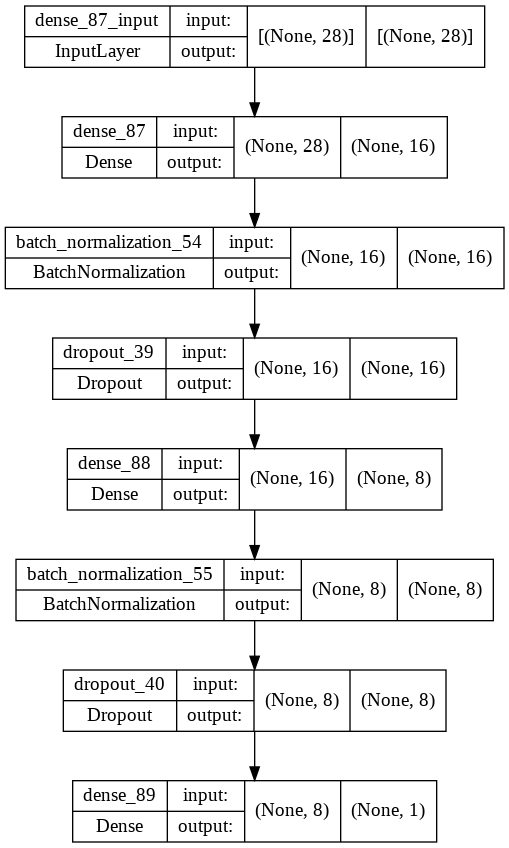

In [341]:
# visualizing the optimized model

keras.utils.plot_model(model_seq_new, show_shapes=True)

In [342]:
# compile the optimized sequential model

model_seq_new.compile(loss= keras.losses.BinaryCrossentropy(),
              optimizer= keras.optimizers.Adam(learning_rate = 0.002),
              metrics= keras.metrics.BinaryAccuracy())

In [343]:
# training the model

history_seq_new = model_seq_new.fit(train_data, epochs=500, 
                                    validation_data= valid_data)

Epoch 1/500
38/38 [==============================] - 1s 8ms/step - loss: 0.8725 - binary_accuracy: 0.5297 - val_loss: 0.5797 - val_binary_accuracy: 0.7506
Epoch 2/500
38/38 [==============================] - 0s 5ms/step - loss: 0.6243 - binary_accuracy: 0.6776 - val_loss: 0.5173 - val_binary_accuracy: 0.7755
Epoch 3/500
38/38 [==============================] - 0s 5ms/step - loss: 0.5300 - binary_accuracy: 0.7443 - val_loss: 0.4822 - val_binary_accuracy: 0.7933
Epoch 4/500
38/38 [==============================] - 0s 5ms/step - loss: 0.5156 - binary_accuracy: 0.7510 - val_loss: 0.4614 - val_binary_accuracy: 0.7922
Epoch 5/500
38/38 [==============================] - 0s 5ms/step - loss: 0.4892 - binary_accuracy: 0.7619 - val_loss: 0.4481 - val_binary_accuracy: 0.7886
Epoch 6/500
38/38 [==============================] - 0s 5ms/step - loss: 0.4820 - binary_accuracy: 0.7674 - val_loss: 0.4388 - val_binary_accuracy: 0.7898
Epoch 7/500
38/38 [==============================] - 0s 5ms/step - los

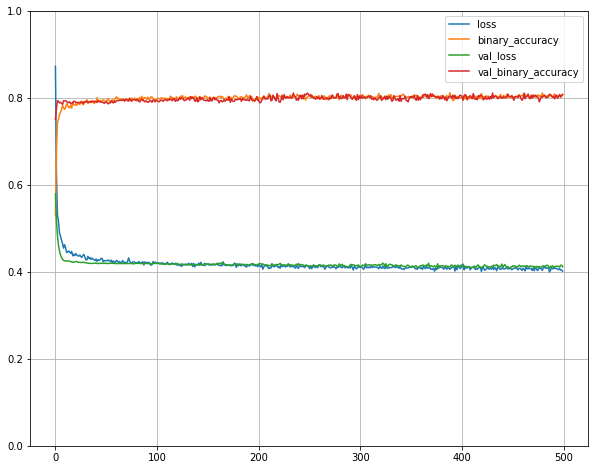

In [344]:
# Graphing the performance of optimized sequential model on every epoch

pd.DataFrame(history_seq_new.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

From the graph above, we can see that both the loss and accuracy of train and validation seems to converge better than the previous sequential model. I suppose this happen due to the dropout method we applied for the optimized sequential model.

In [345]:
# evaluating sequential model performance on test data

print('Classification report (Train)')
y_train_proba_seq_new = model_seq_new.predict(X_train)
y_train_pred_seq_new = np.where(y_train_proba_seq_new >= 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_seq_new))

print('')

print('Classification report (Test)')
y_test_proba_seq_new = model_seq_new.predict(X_test_final)
y_test_pred_seq_new = np.where(y_test_proba_seq_new >= 0.5, 1, 0)
print(classification_report(y_test_final, y_test_pred_seq_new))

Classification report (Train)
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3523
           1       0.70      0.52      0.59      1244

    accuracy                           0.82      4767
   macro avg       0.77      0.72      0.74      4767
weighted avg       0.81      0.82      0.81      4767


Classification report (Test)
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1017
           1       0.67      0.50      0.57       386

    accuracy                           0.79      1403
   macro avg       0.75      0.70      0.72      1403
weighted avg       0.78      0.79      0.78      1403



Above, we can see a slight improvement occurs on the optimized sequential model (f1 score before optimized: 0.56, after optimized: 0.57). This might suggest that the method we applied has the effect on improving the overall model performance. 

## Optimizing functional model

I'll try to improve the functional model by also adding batch normalization and dropout after every hidden layer. As for the activation function and weight initialization, I'll use the same method as before (relu and glorot).

On the compiling step, I'll also double the learning rate to 0.002 (before this I'm using the default of 0.001) so that the model can converge faster to its minimum loss.

In [333]:
# optimizing ANN with functional API

input_ = keras.layers.Input(shape=(28,))
hidden1 = keras.layers.Dense(20, activation='relu')(input_)
batch_normal_1 = keras.layers.BatchNormalization()(hidden1)
dropout1 = keras.layers.Dropout(0.5)(batch_normal_1)
hidden2 = keras.layers.Dense(4, activation='relu')(dropout1)
batch_normal_2 = keras.layers.BatchNormalization()(hidden2)
concat = keras.layers.concatenate([input_, batch_normal_2])
batch_normal_3 = keras.layers.BatchNormalization()(concat)
dropout2 = keras.layers.Dropout(0.4)(batch_normal_3)
output = keras.layers.Dense(1, activation='sigmoid')(dropout2)
model_func_new = keras.models.Model(inputs=[input_], outputs= [output])

In [334]:
# showing optimized functional model summary

model_func_new.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 28)]         0           []                               
                                                                                                  
 dense_84 (Dense)               (None, 20)           580         ['input_21[0][0]']               
                                                                                                  
 batch_normalization_51 (BatchN  (None, 20)          80          ['dense_84[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 dropout_37 (Dropout)           (None, 20)           0           ['batch_normalization_51[0

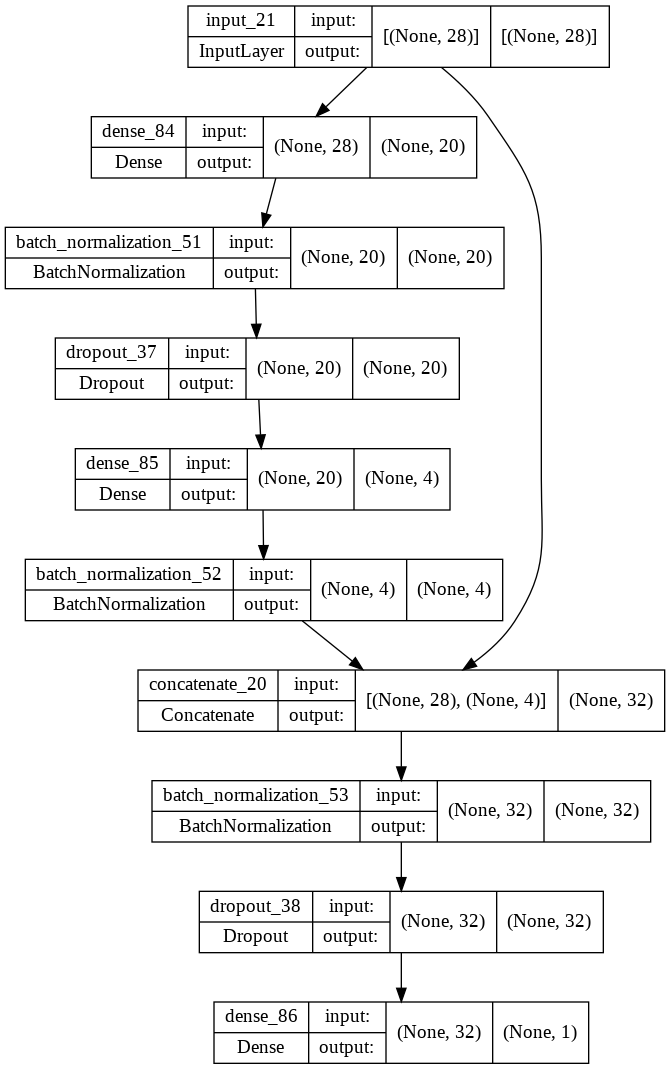

In [335]:
# visualizing the model 

keras.utils.plot_model(model_func_new, show_shapes=True)

In [336]:
# compile the optimized functional model

model_func_new.compile(loss= keras.losses.BinaryCrossentropy(),
              optimizer= keras.optimizers.Adam(learning_rate = 0.002),
              metrics= keras.metrics.BinaryAccuracy())

In [337]:
# training the optimized functional model

history_func_new = model_func_new.fit(train_data, epochs=500, 
                                    validation_data= valid_data)

Epoch 1/500
38/38 [==============================] - 1s 9ms/step - loss: 0.7573 - binary_accuracy: 0.6077 - val_loss: 0.6089 - val_binary_accuracy: 0.6793
Epoch 2/500
38/38 [==============================] - 0s 6ms/step - loss: 0.5884 - binary_accuracy: 0.6981 - val_loss: 0.5016 - val_binary_accuracy: 0.7518
Epoch 3/500
38/38 [==============================] - 0s 5ms/step - loss: 0.5219 - binary_accuracy: 0.7388 - val_loss: 0.4604 - val_binary_accuracy: 0.7827
Epoch 4/500
38/38 [==============================] - 0s 6ms/step - loss: 0.4976 - binary_accuracy: 0.7525 - val_loss: 0.4440 - val_binary_accuracy: 0.7838
Epoch 5/500
38/38 [==============================] - 0s 5ms/step - loss: 0.4817 - binary_accuracy: 0.7602 - val_loss: 0.4361 - val_binary_accuracy: 0.7874
Epoch 6/500
38/38 [==============================] - 0s 6ms/step - loss: 0.4696 - binary_accuracy: 0.7682 - val_loss: 0.4318 - val_binary_accuracy: 0.7910
Epoch 7/500
38/38 [==============================] - 0s 6ms/step - los

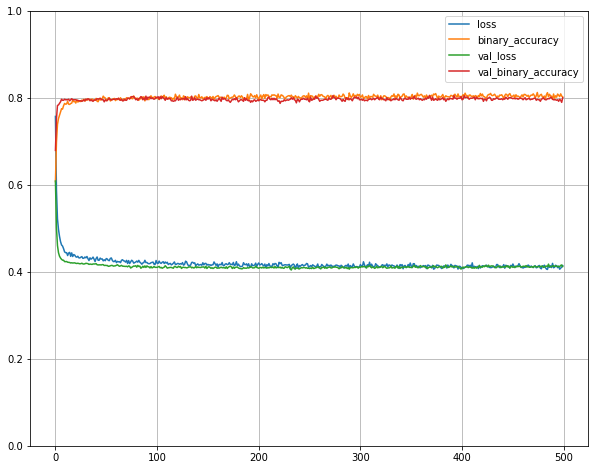

In [338]:
# Graphing the performance of optimized functional model on every epoch

pd.DataFrame(history_func_new.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [268]:
# evaluating optimized functional model performance on test data

print('Classification report (Train)')
y_train_proba_func_new = model_func_new.predict(X_train)
y_train_pred_func_new = np.where(y_train_proba_func_new >= 0.5, 1, 0)
print(classification_report(y_train, y_train_pred_func_new))

print('')

print('Classification report (Test)')
y_test_proba_func_new = model_func_new.predict(X_test_final)
y_test_pred_func_new = np.where(y_test_proba_func_new >= 0.5, 1, 0)
print(classification_report(y_test_final, y_test_pred_func_new))

Classification report (Train)
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3523
           1       0.70      0.53      0.60      1244

    accuracy                           0.82      4767
   macro avg       0.77      0.73      0.74      4767
weighted avg       0.81      0.82      0.81      4767


Classification report (Test)
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1017
           1       0.64      0.50      0.56       386

    accuracy                           0.78      1403
   macro avg       0.73      0.70      0.71      1403
weighted avg       0.77      0.78      0.78      1403



Above, we can see that the functional model performance have been improving slightly after optimization (f1 score before optimization around 0.56 and after optimization around 0.57).

# 9 - Model Saving

In [364]:
# Freezing the best model (optimized ANN with sequential API)

model_seq_new.trainable = False

# Save the best model

model_seq_new.save('churn_model')

In [365]:
! zip -r churn_model.zip churn_model

  adding: churn_model/ (stored 0%)
  adding: churn_model/keras_metadata.pb (deflated 90%)
  adding: churn_model/assets/ (stored 0%)
  adding: churn_model/saved_model.pb (deflated 89%)
  adding: churn_model/variables/ (stored 0%)
  adding: churn_model/variables/variables.data-00000-of-00001 (deflated 49%)
  adding: churn_model/variables/variables.index (deflated 68%)


In [348]:
# Exporting the function and file needed for inference

with open('column_transformer.pkl', 'wb') as file_1:
  pickle.dump(column_trans, file_1)

with open('list_num_features.txt', 'w') as file_2:
  json.dump(num_features, file_2)

with open('list_cat_features.txt', 'w') as file_3:
  json.dump(cat_features, file_3)

# 10 - Model Inference

In [356]:
# Show inference data

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3862,5854-KSRBJ,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1782.05,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
2926,0106-UGRDO,Female,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.00,8182.85,No
6056,8331-ZXFOE,Female,0,No,No,58,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),71.10,4299.20,No
3799,2930-UOTMB,Female,0,No,No,31,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),65.25,1994.30,Yes
6232,9681-OXGVC,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,514.00,Yes
6763,7471-MQPOS,Male,1,Yes,Yes,71,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.90,5139.65,No
6773,3990-QYKBE,Male,1,Yes,No,37,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.50,3473.40,Yes
1878,0463-WZZKO,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.75,67.10,No
2939,8802-UNOJF,Male,1,No,No,12,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,83.80,1029.75,Yes


In [357]:
# data preparation (scaling, encoding) with column transformer 

data_inf_final = column_trans.transform(data_inf)

In [358]:
# Predict data inference

y_inf_proba = model_seq_new.predict(data_inf_final)
y_inf_pred = np.where(y_inf_proba >= 0.5, 'Yes', 'No')

In [359]:
# Show prediction results

data_inf['prediction'] = y_inf_pred
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction
3862,5854-KSRBJ,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1782.05,No,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,No
2926,0106-UGRDO,Female,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.00,8182.85,No,No
6056,8331-ZXFOE,Female,0,No,No,58,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),71.10,4299.20,No,No
3799,2930-UOTMB,Female,0,No,No,31,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),65.25,1994.30,Yes,No
6232,9681-OXGVC,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,514.00,Yes,Yes
6763,7471-MQPOS,Male,1,Yes,Yes,71,Yes,Yes,DSL,No,Yes,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.90,5139.65,No,No
6773,3990-QYKBE,Male,1,Yes,No,37,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.50,3473.40,Yes,Yes
1878,0463-WZZKO,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.75,67.10,No,No
2939,8802-UNOJF,Male,1,No,No,12,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,83.80,1029.75,Yes,No


# 11 - Summary

After procceeding data exploration and model creation for customer churn from the 'Telco-Customer-Churn' dataset, these are the things I can conclude:

1. The dataset is comprised of 7043 rows and 21 columns where every row represents a single customer and column represents customer's information regarding the usage of telco company services (internet services, tenure, gender, Churn, etc.). 

2. From the EDA, it's found that only 26% of the sample is labeled as 'Churn'='Yes', suggesting that we're dealing with an imbalanced data proportion. It was also found that the customers who decide not to churn are those have been stayed longer using the company services (average tenure 37 months, and most of those who churned are the customers how has only been staying for 1 month. 

3. From 7043 rows of data, I'm taking 20 data for inference, 80% for train, and the rest 20% as test. From 20 initial variables that might influence customer's churn, I chose 13 variables with the highest correlation to 'Churn' as my features. Those 13 features are consisted of 3 numerical features and 10 categorical features.

4. For this case, I'm using Artificial Neural Network as my classifier model, from which I'd procceed with both Sequential and Functional API. After improving each model, it has been shown that the optimized sequential model has the best performance overall (f1 score 0.57).

5. I chose f1 score as the evaluation metric because it can precisely summarized both recall and precision score of the model (my opinion is that, recall and precision are equally important for this case). Recall score might give us intuition about the amount of False Negative (Churned customers who are predicted as not churned), while precision might represent False Positive (Not Churned customers who are predicted as Churned). The higher the recall and precision of a model, the lower the False Negative and False Positive of the model respectively. And for this case, both recall and precision score are equally important because we don't want to miss the prediction of customers who'll churn the next month, and we also don't want to predict the loyal customer as if they're going to churn. The right prediction of whose going to churn and whose not will gives the company better insight on how to deliver suitable service to both group.

6. Lastly, although the current ANN model shows acceptable f1 score (0.57), that performance is still far from what can be considered as excellent performance. This means there're still a lot of room for improvement. The first improvement can be achieved through amplifying the amount of training data with more balanced proportion of positive and negative samples ('Churned' and 'not-Churned'). Secondly, we can improve the model by experimenting the combinations of different layers and different amount of neurons, also by tweaking the activation function, trying different optimizers with different combinations of learning rate, and other methods that might optimize the model performance.